# Alpha Shapes with GeoPandas

## Sample Data

The data used in this notebook can be obtained from the Alaska Department of Transportation and Public Facilities website at the link below.  It consists of a point collection for each of the public airports in Alaska.

[http://www.dot.alaska.gov/stwdplng/mapping/shapefiles.shtml](http://www.dot.alaska.gov/stwdplng/mapping/shapefiles.shtml)

## Load the Shapefile

In [1]:
import geopandas
SCRIPT_PATH = os.getcwd()
data = os.path.join(SCRIPT_PATH, 'airports.shp')
gdf = geopandas.read_file(data)
gdf

,AREA,PERIMETER,AIRPRTX020,LOCID,FEATURE,NAME,TOT_ENP,STATE,COUNTY,FIPS,STATE_FIPS,geometry
0,0.0,0.0,5,4Z7,Seaplane Base,Hyder,319,None,Prince of Wales-Outer Ketchikan Census Area,02201,02,POINT (-130.0125274658203 55.90433883666992)
1,0.0,0.0,6,KCL,Airport,Chignik Lagoon,2697,AK,Lake and Peninsula Borough,02164,02,POINT (-158.5325622558594 56.30786895751953)
2,0.0,0.0,7,KKA,Airport,Koyuk,2346,AK,Nome Census Area,02180,02,POINT (-161.1510772705078 64.93807220458984)
3,0.0,0.0,8,KVL,Airport,Kivalina,3313,AK,Northwest Arctic Borough,02188,02,POINT (-164.5255889892578 67.74520874023438)
4,0.0,0.0,10,5KE,Seaplane Base,Ketchikan Harbor,46644,AK,Ketchikan Gateway Borough,02130,02,POINT (-131.6851043701172 55.34780883789063)
5,0.0,0.0,666,MTM,Seaplane Base,Metlakatla,15387,AK,Prince of Wales-Outer Ketchikan Census Area,02201,02,POINT (-131.5780639648438 55.13104629516602)
6,0.0,0.0,667,KWF,Seaplane Base,Waterfall,2018,AK,Prince of Wales-Outer Ketchikan Census Area,02201,02,POINT (-133.2433319091797 55.29632186889648)
7,0.0,0.0,668,KTN,Airport,Ketchikan,132451,AK,Ketchikan Gateway Borough,02130,02,POINT (-131.7137451171875 55.35556793212891)
8,0.0,0.0,669,KXA,Seaplane Base,Kasaan,455,None,Prince of Wales-Outer Ketchikan Census Area,02201,02,POINT (-132.3975219726563 55.53741455078125)
9,0.0,0.0,670,HYL,Seaplane Base,Hollis,4170,AK,Prince of Wales-Outer Ketchikan Census Area,02201,02,POINT (-132.6460876464844 55.48158645629883)


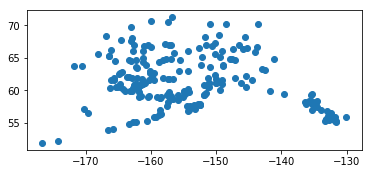

In [2]:
%matplotlib inline
gdf.plot()

In [3]:
gdf.crs

{'init': 'epsg:4269'}

## Generate Alpha Shape
The alpha shape will be generated in the coordinate frame the geodataframe is in.  In this example, we will project into an Albers Equal Area projection, construct our alpha shape in that coordinate system, and then convert back to the source projection.

### Project to Albers Equal Area Spatial Reference

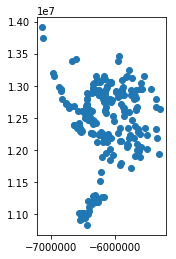

In [4]:
import cartopy.crs as ccrs
gdf_proj = gdf.to_crs(ccrs.AlbersEqualArea().proj4_init)
gdf_proj.plot()

### Determine the Alpha Shape

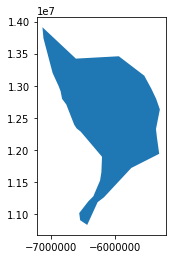

In [5]:
import alphashape
alpha_shape = alphashape.alphashape(gdf_proj)
alpha_shape.plot()

### Plotting the Alpha Shape over the Data Points
#### Plate Carree Projection

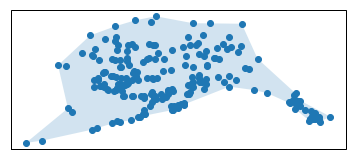

In [6]:
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.AlbersEqualArea())
ax.add_geometries(
    alpha_shape['geometry'],
    crs=ccrs.AlbersEqualArea(), alpha=.2)
plt.show()

#### Robinson Projection

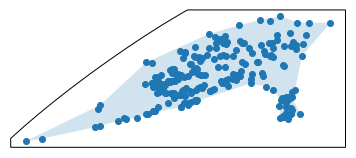

In [7]:
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.Robinson())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.AlbersEqualArea())
ax.add_geometries(
    alpha_shape['geometry'],
    crs=ccrs.AlbersEqualArea(), alpha=.2)
plt.show()